#Install & Import Libraries


In [ ]:
!pip3 install pydub
!pip3 install xmltodict
!pip3 install resemblyzer
!pip3 install pyannote.core
!pip3 install noisereduce
!pip3 install pyannote.metrics
!pip3 install python_speech_features
!pip3 install spectralcluster
!pip3 install hdbscan
!pip3 install keras
!pip3 install tensorflow_addons

     |████████████████████████████████| 15.7MB 1.6MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp37-none-any.whl size=26308 sha256=294795f7b0f5b3c89f30d318eb2526e669643f97a45681f2b1bc60626b9dab25
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72317 sha256=2d3e24ced091c24c24582526e6de1f292a98d608911777e4b4060fe4acdae289
  Stored in directory: /root/.cache/pip/wheels/44/2a/18/bd1aec41cac7c3051fe95d92a6ed446122ea31dc713c432fa1
Successfully built typing webrtcvad


     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 133kB 7.9MB/s 
  Created wheel for noisereduce: filename=noisereduce-1.1.0-cp37-none-any.whl size=7610 sha256=b53969f6b6f0ad3d3a4c6b5fecf001a1baada7ac4bd6b133c7b97294a599d1d9
  Stored in directory: /root/.cache/pip/wheels/a6/2c/70/f9ccb41280dcfbe3eaeb7930f913dd85394617f3d3136f29cc
Successfully built noisereduce
     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 92kB 4.4MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp37-none-any.whl size=5887 sha256=79ab7ff69ce2110275611e811b5e3bc9c9e368e35b2928a7f479a00f40f0808d
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-sp

In [ ]:
## Mount Colab Drive To Load Dataset

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
from pydub import AudioSegment
import xmltodict
import os
os.path.join('a','b')

## Import resemblyzer for library based pre-trained encoder 
from resemblyzer import VoiceEncoder, preprocess_wav
from pathlib import Path
import numpy as np

## Import necessary functions for parsing XML data files
from operator import itemgetter
from lxml import etree
import xml.etree.ElementTree as ET
import json

## Import librosa for processing wav files
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio, display
from math import ceil


from pyannote.core import Segment, Timeline, Annotation, notebook
import noisereduce as nr
from tqdm import tqdm

## Import functions for manually computing mfcc features
from python_speech_features import fbank
from random import choice


In [ ]:
from sklearn.model_selection import train_test_split

#Data Preprocessing



In [ ]:
#@title
# Constants.

# SAMPLE_RATE = 16000  # not higher than that otherwise we may have errors when computing the fbanks.


In [ ]:
###################### PATH TO CORPUS & AUDIO FOLDER ######################
AMI_CORPUS_FOLDER = './drive/MyDrive/ATML/ami_public_manual_1.6.2/words'
AMI_CORPUS_FOLDER2 = './drive/MyDrive/amicorpusfinal/ami_public_manual_1.6.2/words'
AMI_AUDIO_FOLDER = './drive/MyDrive/ATML/amicorpus/'
AMI_AUDIO_FOLDER1 = './drive/MyDrive/amicorpus/'
AMI_AUDIO_FOLDER2 = './drive/MyDrive/amicorpusfinal/'
 
SPEAKERS = ['A', 'B', 'C', 'D']
X_FILENAME = 'X_withoutEmbedding_LSTM.txt'
Y_FILENAME = 'y_LSTM.txt'
TIME_FILENAME = 'startEndTime_LSTM.txt'

## Set Threshold for VAD
THRESHOLD_VAD = 0.25  


In [ ]:
#@title
## Define Functions for reading writing X and y vectors from AMI Corpus Datset

import pickle

def write(list1,filename):
  l = list1
  with open(filename, "wb") as fp:   #Pickling
    pickle.dump(l, fp)

def read(filename):
  with open(filename, "rb") as fp:   # Unpickling
    b = pickle.load(fp)
  return b

###Read Training Data


In [ ]:
# Code to read X_withoutEmbedding startEndTime y from txt file
# Put file names in WORKING_RECORDING_IDS list to get X_withoutEmbedding startEndTime y 


# List of file used in train, validation and testing

TRAIN_WORKING_RECORDING_IDS = ['IS1000b', 'IS1001b', 'IS1002b', 'IS1003b', 'IS1004b', 'IS1005b', 'IS1006b', 
                               'TS3003b', 'TS3004b', 'TS3005b', 'TS3006b', 'TS3007b', 'TS3008b', 'TS3009b',
                               'ES2002a', 'ES2004a', 'ES2005a', 'ES2006a', 'ES2006b', 'ES2007a', 'ES2009a']



VAL_WORKING_RECORDING_IDS = ['IS1007b', 'IS1008b',
                             'TS3010b', 'TS3011b',
                             'ES2010a', 'ES2011a']

TEST_WORKING_RECORDING_IDS = [ 'IS1009b',
                              'TS3012b',
                              'ES2012a']


# For Reading stored Data
def read_all(RECORDING_ID,AMI_AUDIO_FOLDER):
  X_withoutEmbedding = read(os.path.join(AMI_AUDIO_FOLDER,RECORDING_ID,X_FILENAME))
  y = read(os.path.join(AMI_AUDIO_FOLDER,RECORDING_ID,Y_FILENAME))
  startEndTime = read(os.path.join(AMI_AUDIO_FOLDER,RECORDING_ID,TIME_FILENAME))
  return X_withoutEmbedding, y, startEndTime


# For modifying time so that time will not overlap of different file 
def modifyTime(startEndTime):
  temp = [0]
  for i in range(1,len(startEndTime)):
    if(startEndTime[i][0]<startEndTime[i-1][0]):
      temp.append(temp[i-1]+startEndTime[i-1][1])
    else:
      temp.append(temp[i-1]) 
  for i in range(len(startEndTime)):
    startEndTime[i][0] = startEndTime[i][0] + temp[i] 
    startEndTime[i][1] = startEndTime[i][1] + temp[i]
  return temp


# Appending all the x,y vectors to create single x,y vector list
def createFinalList(WORKING_RECORDING_IDS,AMI_AUDIO_FOLDER):
  X_withoutEmbedding, y, startEndTime = read_all(WORKING_RECORDING_IDS[0],AMI_AUDIO_FOLDER)
  for i in range(1,len(WORKING_RECORDING_IDS)):
    X_withoutEmbedding_temp, y_temp, startEndTime_temp = read_all(WORKING_RECORDING_IDS[i],AMI_AUDIO_FOLDER)
    ## modify y
    y_temp = [n + 4*i for n in y_temp]
    ## modify startEndTime
    startEndTime.extend(startEndTime_temp)
    modifyTime(startEndTime)
    X_withoutEmbedding.extend(X_withoutEmbedding_temp)
    y.extend(y_temp)
    
  return X_withoutEmbedding, y, startEndTime

In [ ]:
#@title
'''

# code to create X_withoutEmbedding startEndTime y
def read_xml_and_split(RECORDING_ID,AMI_AUDIO_FOLDER):
  X_withoutEmbedding = []
  y = []
  startEndTime = []
  y_ref = []
  startEndTime_ref = []
  speakers_phrases = []
  
  ## Reading start end time and corrosponding labels
  for index, speaker in enumerate(SPEAKERS):
      t = parse_ami_transcript_xml(
          f"{AMI_CORPUS_FOLDER}/{RECORDING_ID}.{speaker}.words.xml", index)
      speakers_phrases.extend(t)
  final = sorted(speakers_phrases, key=itemgetter('start'))
  print(len(final))

  # Creating referance start end time vector and corrosponding label vector 'y'
  for i in range(len(final)):
    speaker = final[i]['speaker_id']
    startEndTime_ref.append([final[i]['start'],final[i]['end']])
    y_ref.append(speaker)

  # creating x vector for chunk size of 1 second and preprocessing it using MFCC
  for i in range(len(final)):
    speaker = final[i]['speaker_id']
    for j in range(0,int((final[i]['end']-final[i]['start']))):
      temp, sr = librosa.load(os.path.join(AMI_AUDIO_FOLDER2,RECORDING_ID,'audio',
                                           f'{RECORDING_ID}.Mix-Headset.wav'),
                              offset = final[i]['start']+j, duration = 1)
      mfccs = librosa.feature.mfcc(temp, sr, n_mfcc=20)
      X_withoutEmbedding.append(mfccs.T)
      y.append(speaker)      
      startEndTime.append([final[i]['start']+j,final[i]['start']+(j+1)])
  
  return X_withoutEmbedding, y, startEndTime


WORKING_RECORDING_IDS = TRAIN_WORKING_RECORDING_IDS


# Creating Train data 
X_LSTM, y_LSTM, startEndTime_LSTM = read_xml_and_split(WORKING_RECORDING_IDS[0],AMI_AUDIO_FOLDER2)
for i in range(1, len(WORKING_RECORDING_IDS)):
  X_withoutEmbedding_temp, y_temp, startEndTime_temp = read_xml_and_split(WORKING_RECORDING_IDS[i],AMI_AUDIO_FOLDER2)
  y_temp = [n + 4*i for n in y_temp] ## modify y so that speaker of different file have different label
  startEndTime_LSTM.extend(startEndTime_temp)
  modifyTime(startEndTime_LSTM) ## modify startEndTime
  X_LSTM.extend(X_withoutEmbedding_temp)
  y_LSTM.extend(y_temp)

# Creating Valadiation data 
X_LSTM_test, y_LSTM_test, startEndTime_LSTM_test = read_xml_and_split(VAL_WORKING_RECORDING_IDS[0],AMI_AUDIO_FOLDER2)
for i in range(1, len(VAL_WORKING_RECORDING_IDS)):
  X_withoutEmbedding_temp, y_temp, startEndTime_temp = read_xml_and_split(VAL_WORKING_RECORDING_IDS[i],AMI_AUDIO_FOLDER2)
  y_temp = [n + 4*i for n in y_temp] ## modify y so that speaker of different file have different label
  startEndTime_LSTM_test.extend(startEndTime_temp)
  modifyTime(startEndTime_LSTM_test)  ## modify startEndTime
  X_LSTM_test.extend(X_withoutEmbedding_temp)
  y_LSTM_test.extend(y_temp)
  
'''



'\n\n# code to create X_withoutEmbedding startEndTime y\ndef read_xml_and_split(RECORDING_ID,AMI_AUDIO_FOLDER):\n  X_withoutEmbedding = []\n  y = []\n  startEndTime = []\n  y_ref = []\n  startEndTime_ref = []\n  speakers_phrases = []\n  \n  ## Reading start end time and corrosponding labels\n  for index, speaker in enumerate(SPEAKERS):\n      t = parse_ami_transcript_xml(\n          f"{AMI_CORPUS_FOLDER}/{RECORDING_ID}.{speaker}.words.xml", index)\n      speakers_phrases.extend(t)\n  final = sorted(speakers_phrases, key=itemgetter(\'start\'))\n  print(len(final))\n\n  # Creating referance start end time vector and corrosponding label vector \'y\'\n  for i in range(len(final)):\n    speaker = final[i][\'speaker_id\']\n    startEndTime_ref.append([final[i][\'start\'],final[i][\'end\']])\n    y_ref.append(speaker)\n\n  # creating x vector for chunk size of 1 second and preprocessing it using MFCC\n  for i in range(len(final)):\n    speaker = final[i][\'speaker_id\']\n    for j in range(0,

In [ ]:
## Read Dataset from Already Preprocessed Dataset
WORKING_RECORDING_IDS = ['IS1000b', 'IS1001b', 'IS1002b', 'IS1003b', 'IS1004b', 'IS1005b', 'IS1006b', 
                               'TS3003b', 'TS3004b', 'TS3005b', 'TS3006b', 'TS3007b', 'TS3008b', 'TS3009b',
                               'ES2002a', 'ES2004a', 'ES2005a', 'ES2006a', 'ES2006b', 'ES2007a', 'ES2009a',
                              'IS1007b', 'IS1008b',
                             'TS3010b', 'TS3011b',
                             'ES2010a', 'ES2011a']
X, y, _ = createFinalList(WORKING_RECORDING_IDS,AMI_AUDIO_FOLDER2)


In [ ]:
#@title
## storing above preprocessed vector
'''

# write(X_LSTM,'/content/drive/MyDrive/LSTM_Train_list/'+'X_LSTM_T1.txt')
# write(y_LSTM,'/content/drive/MyDrive/LSTM_Train_list/'+'y_LSTM_T1.txt')
# write(startEndTime_LSTM,'/content/drive/MyDrive/LSTM_Train_list/'+'startEndTime_LSTM_T1.txt')
# write(X_LSTM_test,'/content/drive/MyDrive/LSTM_Train_list/'+'X_LSTM_test.txt')
# write(y_LSTM_test,'/content/drive/MyDrive/LSTM_Train_list/'+'y_LSTM_test.txt')
# write(startEndTime_LSTM_test,'/content/drive/MyDrive/LSTM_Train_list/'+'startEndTime_LSTM_test.txt')
'''

## Reading the stored vector For Training with validation set
'''
# X_LSTM = read('/content/drive/MyDrive/LSTM_Train_list/'+'X_LSTM.txt')
# y_LSTM = read('/content/drive/MyDrive/LSTM_Train_list/'+'y_LSTM.txt')
# startEndTime_LSTM = read('/content/drive/MyDrive/LSTM_Train_list/'+'startEndTime_LSTM.txt')
# X_LSTM_test = read('/content/drive/MyDrive/LSTM_Train_list/'+'X_LSTM_test.txt')
# y_LSTM_test = read('/content/drive/MyDrive/LSTM_Train_list/'+'y_LSTM_test.txt')
# startEndTime_LSTM_test=read('/content/drive/MyDrive/LSTM_Train_list/'+'startEndTime_LSTM_test.txt')
'''

"\n# X_LSTM = read('/content/drive/MyDrive/LSTM_Train_list/'+'X_LSTM.txt')\n# y_LSTM = read('/content/drive/MyDrive/LSTM_Train_list/'+'y_LSTM.txt')\n# startEndTime_LSTM = read('/content/drive/MyDrive/LSTM_Train_list/'+'startEndTime_LSTM.txt')\n# X_LSTM_test = read('/content/drive/MyDrive/LSTM_Train_list/'+'X_LSTM_test.txt')\n# y_LSTM_test = read('/content/drive/MyDrive/LSTM_Train_list/'+'y_LSTM_test.txt')\n# startEndTime_LSTM_test=read('/content/drive/MyDrive/LSTM_Train_list/'+'startEndTime_LSTM_test.txt')\n"

### Create Tenserflow Dataset from Preprocessed Chunks + Labels


In [ ]:
print(X[0].shape) # Dimension of preprocessed(MFCC) chunk

(59, 44)


In [ ]:
print(len(y)) # Number of chunks
print(np.unique(y)) # Number of unique speakers

24721
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]


In [ ]:
X_LSTM, X_LSTM_test, y_LSTM, y_LSTM_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [ ]:
X_LSTM = np.array(X_LSTM)
y_LSTM = np.array(y_LSTM)


## Uncomment this if using validation 

X_LSTM_test = np.array(X_LSTM_test)
y_LSTM_test = np.array(y_LSTM_test)


In [ ]:
## importing keras

import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import tensorflow.keras.layers as layers
import keras.layers as layers

In [ ]:
# Modifing vector according to LSTM Model requirement

def map_data(data, label):
    return (data, label)

train_dataset = tf.data.Dataset.from_tensor_slices((X_LSTM, y_LSTM)) 
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.map(map_data)

## Uncomment this if using validation 

test_dataset = tf.data.Dataset.from_tensor_slices((X_LSTM_test, y_LSTM_test)) 
test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.map(map_data)

In [ ]:
print(train_dataset)

<MapDataset shapes: ((None, 59, 44), (None,)), types: (tf.float32, tf.int32)>


# Create Embeddings using LSTM Model

###Define AMI-LSTM Architecture and Triplet Net Model


In [ ]:
## AMI-LSTM Network for Encoding Speech MFCC Features into Embedding vector

model = keras.Sequential()
model.add(layers.LSTM(768, input_shape = (59,44), return_sequences=True))
model.add(layers.LSTM(768, return_sequences=True))
model.add(layers.LSTM(768))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(256, activation=None))
model.add(layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 59, 768)           2497536   
_________________________________________________________________
lstm_10 (LSTM)               (None, 59, 768)           4721664   
_________________________________________________________________
lstm_11 (LSTM)               (None, 768)               4721664   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               196864    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
lambda_3 (Lambda)            (None, 256)              

###Define Model Training Function

In [ ]:
## Use CallBack to keep track of best performing model till yet and save its weights
from keras.callbacks import ModelCheckpoint # autosave best Model 
best_model_file = "/content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs" 
best_model = ModelCheckpoint(best_model_file, monitor='val_loss', mode='min', save_best_only=True,verbose=1) 

In [ ]:
## Compile AMI-LSTM Model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.001, momentum=.05), loss=tfa.losses.TripletHardLoss())
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=.003), loss=tfa.losses.TripletHardLoss())

In [ ]:
'''
## Uncomment this code to train the model from scratch
history = model.fit(train_dataset, epochs=50, validation_data=test_dataset, callbacks=[best_model])
'''

Epoch 1/50
618/618 [==============================] - 43s 64ms/step - loss: 0.4909 - val_loss: 0.4274

Epoch 00001: val_loss improved from inf to 0.42740, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 2/50
618/618 [==============================] - 39s 63ms/step - loss: 0.4302 - val_loss: 0.4081

Epoch 00002: val_loss improved from 0.42740 to 0.40806, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 3/50
618/618 [==============================] - 39s 63ms/step - loss: 0.4132 - val_loss: 0.3995

Epoch 00003: val_loss improved from 0.40806 to 0.39949, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 4/50
618/618 [==============================] - 39s 63ms/step - loss: 0.4053 - val_loss: 0.3948

Epoch 00004: val_loss improved from 0.39949 to 0.39476, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 5/50
618/618 [==============================] - 39s 63ms/step - loss: 0.4005 - val_loss: 0.3917

Epoch 00005: val_loss improved from 0.39476 to 0.39172, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 6/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3968 - val_loss: 0.3893

Epoch 00006: val_loss improved from 0.39172 to 0.38931, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 7/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3937 - val_loss: 0.3876

Epoch 00007: val_loss improved from 0.38931 to 0.38764, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 8/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3904 - val_loss: 0.3857

Epoch 00008: val_loss improved from 0.38764 to 0.38565, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 9/50
618/618 [==============================] - 40s 65ms/step - loss: 0.3879 - val_loss: 0.3840

Epoch 00009: val_loss improved from 0.38565 to 0.38402, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 10/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3861 - val_loss: 0.3826

Epoch 00010: val_loss improved from 0.38402 to 0.38263, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 11/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3838 - val_loss: 0.3813

Epoch 00011: val_loss improved from 0.38263 to 0.38126, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 12/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3818 - val_loss: 0.3796

Epoch 00012: val_loss improved from 0.38126 to 0.37956, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 13/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3798 - val_loss: 0.3788

Epoch 00013: val_loss improved from 0.37956 to 0.37882, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 14/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3781 - val_loss: 0.3781

Epoch 00014: val_loss improved from 0.37882 to 0.37809, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 15/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3765 - val_loss: 0.3771

Epoch 00015: val_loss improved from 0.37809 to 0.37711, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 16/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3754 - val_loss: 0.3770

Epoch 00016: val_loss improved from 0.37711 to 0.37705, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 17/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3733 - val_loss: 0.3751

Epoch 00017: val_loss improved from 0.37705 to 0.37506, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 18/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3721 - val_loss: 0.3748

Epoch 00018: val_loss improved from 0.37506 to 0.37477, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 19/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3706 - val_loss: 0.3751

Epoch 00019: val_loss did not improve from 0.37477
Epoch 20/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3699 - val_loss: 0.3740

Epoch 00020: val_loss improved from 0.37477 to 0.37404, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 21/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3689 - val_loss: 0.3744

Epoch 00021: val_loss did not improve from 0.37404
Epoch 22/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3681 - val_loss: 0.3727

Epoch 00022: val_loss improved from 0.37404 to 0.37271, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 23/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3669 - val_loss: 0.3733

Epoch 00023: val_loss did not improve from 0.37271
Epoch 24/50
618/618 [==============================] - 39s 63ms/step - loss: 0.3663 - val_loss: 0.3736

Epoch 00024: val_loss did not improve from 0.37271
Epoch 25/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3655 - val_loss: 0.3722

Epoch 00025: val_loss improved from 0.37271 to 0.37215, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 26/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3647 - val_loss: 0.3739

Epoch 00026: val_loss did not improve from 0.37215
Epoch 27/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3643 - val_loss: 0.3729

Epoch 00027: val_loss did not improve from 0.37215
Epoch 28/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3640 - val_loss: 0.3720

Epoch 00028: val_loss improved from 0.37215 to 0.37201, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 29/50
618/618 [==============================] - 40s 65ms/step - loss: 0.3634 - val_loss: 0.3723

Epoch 00029: val_loss did not improve from 0.37201
Epoch 30/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3624 - val_loss: 0.3743

Epoch 00030: val_loss did not improve from 0.37201
Epoch 31/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3615 - val_loss: 0.3738

Epoch 00031: val_loss did not improve from 0.37201
Epoch 32/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3611 - val_loss: 0.3724

Epoch 00032: val_loss did not improve from 0.37201
Epoch 33/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3613 - val_loss: 0.3712

Epoch 00033: val_loss improved from 0.37201 to 0.37115, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 34/50
618/618 [==============================] - 40s 65ms/step - loss: 0.3603 - val_loss: 0.3709

Epoch 00034: val_loss improved from 0.37115 to 0.37090, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 35/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3599 - val_loss: 0.3709

Epoch 00035: val_loss improved from 0.37090 to 0.37090, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 36/50
618/618 [==============================] - 40s 65ms/step - loss: 0.3594 - val_loss: 0.3717

Epoch 00036: val_loss did not improve from 0.37090
Epoch 37/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3593 - val_loss: 0.3717

Epoch 00037: val_loss did not improve from 0.37090
Epoch 38/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3584 - val_loss: 0.3708

Epoch 00038: val_loss improved from 0.37090 to 0.37082, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 39/50
618/618 [==============================] - 40s 65ms/step - loss: 0.3582 - val_loss: 0.3709

Epoch 00039: val_loss did not improve from 0.37082
Epoch 40/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3576 - val_loss: 0.3702

Epoch 00040: val_loss improved from 0.37082 to 0.37017, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 41/50
618/618 [==============================] - 40s 65ms/step - loss: 0.3577 - val_loss: 0.3732

Epoch 00041: val_loss did not improve from 0.37017
Epoch 42/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3569 - val_loss: 0.3733

Epoch 00042: val_loss did not improve from 0.37017
Epoch 43/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3565 - val_loss: 0.3705

Epoch 00043: val_loss did not improve from 0.37017
Epoch 44/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3560 - val_loss: 0.3707

Epoch 00044: val_loss did not improve from 0.37017
Epoch 45/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3554 - val_loss: 0.3701

Epoch 00045: val_loss improved from 0.37017 to 0.37015, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 46/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3548 - val_loss: 0.3714

Epoch 00046: val_loss did not improve from 0.37015
Epoch 47/50
618/618 [==============================] - 40s 64ms/step - loss: 0.3547 - val_loss: 0.3714

Epoch 00047: val_loss did not improve from 0.37015
Epoch 48/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3546 - val_loss: 0.3691

Epoch 00048: val_loss improved from 0.37015 to 0.36911, saving model to /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best.hs/assets


Epoch 49/50
618/618 [==============================] - 40s 65ms/step - loss: 0.3545 - val_loss: 0.3729

Epoch 00049: val_loss did not improve from 0.36911
Epoch 50/50
618/618 [==============================] - 39s 64ms/step - loss: 0.3536 - val_loss: 0.3708

Epoch 00050: val_loss did not improve from 0.36911


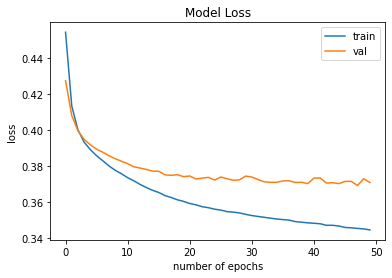

In [ ]:
## Plot Train and Validation Lossees
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend((['train', 'val']), loc='upper right')
plt.show()

In [ ]:
'''
## Uncomment this code to save the model weights obtained at training for all the epochs
model.save('/content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best_50epochs.h5')
'''

In [ ]:
'''
## Uncomment this code to save the model history obtained at the end of training
with open('/content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
'''

In [ ]:
## Load best model weights 
model.load_weights("/content/drive/MyDrive/TransferLearningBestModels/Base_LSTM_Freeze_Best_50epochs.h5")

In [ ]:
## Evaluating model on training data
model.evaluate(X_LSTM, y_LSTM)

## Evaluating model on validation data
model.evaluate(X_LSTM_test, y_LSTM_test)

155/155 [==============================] - 4s 23ms/step - loss: 0.3737


0.37366783618927

###Used Trained Model to Extract Embedding for Wav chunks

In [ ]:
## Creating X, y, start end time vector on train and test data for DER calculation

## Training data
X_withoutEmbedding, y, startEndTime = read_all(TRAIN_WORKING_RECORDING_IDS[20],AMI_AUDIO_FOLDER2)

## Unknown test data
X_withoutEmbedding_test, y_test, startEndTime_test = read_all(TEST_WORKING_RECORDING_IDS[2],AMI_AUDIO_FOLDER2)

In [ ]:
## Modifing train data according to LSTM Model requirement
train_dataset_embedding = tf.data.Dataset.from_tensor_slices((X_withoutEmbedding, y)) 
train_dataset_embedding = train_dataset_embedding.batch(32)
train_dataset_embedding = train_dataset_embedding.map(map_data)

## Modifing test data according to LSTM Model requirement
test_dataset_embedding = tf.data.Dataset.from_tensor_slices((X_withoutEmbedding_test, y_test)) 
test_dataset_embedding = test_dataset_embedding.batch(32)
test_dataset_embedding = test_dataset_embedding.map(map_data)

In [ ]:
# Creating embedding from trained LSTM Model on train and test data

train_embeddings_tl, train_labels_tl = model.predict(train_dataset_embedding), y
test_embeddings_tl, test_labels_tl = model.predict(test_dataset_embedding), y_test


In [ ]:
## Extract Embeddings
X, y = np.array(train_embeddings_tl), np.array([int(i) for i in train_labels_tl])

In [ ]:
X_test, y_test =  np.array(test_embeddings_tl), np.array([int(i) for i in test_labels_tl])

# Cluster Plot of Embeddings

####PCA for Dataset Emebeddings (with True Labels)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

def preprocessingX(X):
  # Preprocessing the data to make it visualizable 
  raw_df = pd.DataFrame(X)  

  # Scaling the Data 
  scaler = StandardScaler() 
  X_scaled = scaler.fit_transform(raw_df) 

  # Normalizing the Data 
  X_normalized = preprocessing.normalize(X_scaled) 

  # Converting the numpy array into a pandas DataFrame 
  X_normalized = pd.DataFrame(X_normalized) 

  # Reducing the dimensions of the data 
  pca = PCA(n_components = 2) 
  X_principal = pca.fit_transform(X_normalized) 
  X_principal = pd.DataFrame(X_principal) 
  X_principal.columns = ['P1', 'P2'] 
  return X_principal

X_principal = preprocessingX(X)
X_principal_test = preprocessingX(X_test)

X_principal.head(2) 

,P1,P2
0,0.078878,0.365079
1,-0.139882,-0.050297


###Plot of Spectral Clustering When exact number of speakers known

####Using Radial Basis Function 


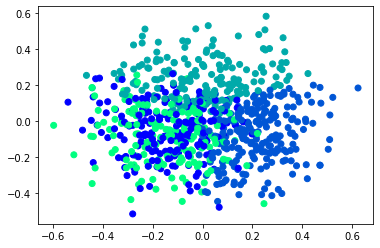

In [ ]:
from sklearn.cluster import SpectralClustering

# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf') 

# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = SpectralClustering(n_clusters = 4, affinity ='rbf') .fit_predict(X), cmap =plt.cm.winter) 
plt.show() 

####Using Nearest Neighbours function

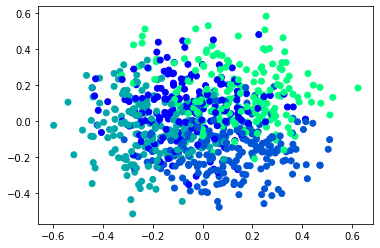

In [ ]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal)

# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors') .fit_predict(X), cmap =plt.cm.winter) 
plt.show() 

###Plot of Spectral Clustering When number of speaker not known beforehand


### Scatter Plot with True Labels as color vector (4 clusters -> 4 speakers)

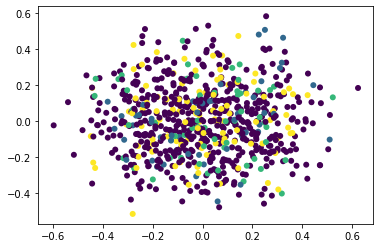

In [ ]:
c = np.random.choice(range(4), 100)

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X_principal['P1'], X_principal['P2'], c=y, lw=0)

#### Using Spectral Clustering Algorithm

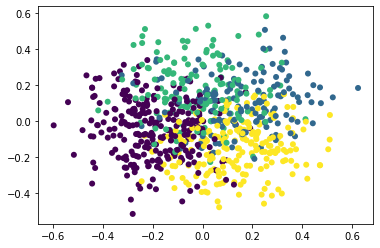

In [ ]:
from spectralcluster import SpectralClusterer

clusterer1 = SpectralClusterer(
    min_clusters=4,
    max_clusters=100,
    p_percentile=0.95,
    gaussian_blur_sigma=0.25)

labels1 = clusterer1.predict(X)
labels_test1 = clusterer1.predict(X_test)

c = np.random.choice(range(4), 100)

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X_principal['P1'], X_principal['P2'], c=labels1, lw=0)


#### Using Agglomerative Heirarchical Clustering Function

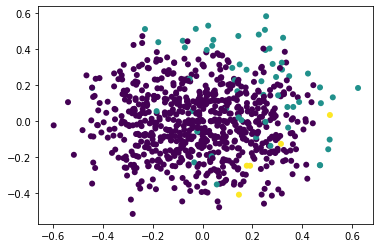

In [ ]:
import hdbscan

clusterer2 = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=4, min_samples=None, p=None)

clusterer2.fit(X)
labels2 = clusterer2.labels_

clusterer2.fit(X_test)
labels_test2 = clusterer2.labels_

c = np.random.choice(range(4), 100)

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X_principal['P1'], X_principal['P2'], c=labels2, lw=0)

# Make Predictions Using Embeddings



### Calculate Diarization Error Rate (DER) values

In [ ]:
## Create Helper Fucntions to Compute DER

from pyannote.metrics.diarization import DiarizationErrorRate, GreedyDiarizationErrorRate, JaccardErrorRate

## Compute Speeker Segments from Model output
def get_hypothesis(speaker_segments):
    hypothesis = Annotation()
    for t in speaker_segments:
        try:
            hypothesis[Segment(t['start'], t['end'])] = f"{t['speaker_id']}_hyp"
        except:
            pass
        
    return hypothesis

## Compute Speeker Segments from Ground Truth
def get_ref(speaker_segments):
    reference = Annotation()
    for t in speaker_segments:
        try:
            reference[Segment(t['start'], t['end'])] = f"{t['speaker_id']}_ref"
        except:
            pass
        
    return reference

der = DiarizationErrorRate()
gder = GreedyDiarizationErrorRate()
jer = JaccardErrorRate()

## Compute DER
def measure_metrics(reference, hypothesis):
    der_value = der(reference, hypothesis)
    print('DER:', der_value)
    
    return der_value

In [ ]:
## Compute Speaker Start End Time Segments
def ref_hypo(startEndTime,startEndTime_ref,labels,y):
  speaker_segments = []
  for i in range(len(startEndTime)):
    speaker_segments.append({
                        'start': startEndTime[i][0],
                        'end': startEndTime[i][1],
                        'speaker_id': labels[i]
                    })
  speaker_segments_ref = []
  for i in range(len(startEndTime_ref)):
    speaker_segments_ref.append({
                        'start': startEndTime_ref[i][0],
                        'end': startEndTime_ref[i][1],
                        'speaker_id': y[i]
                    })
  return speaker_segments,speaker_segments_ref

# labels = labels1
labels = labels2

# labels_test = labels_test1
labels_test = labels_test2

speaker_segments,speaker_segments_ref = ref_hypo(startEndTime,startEndTime,labels,y)
speaker_segments_test,speaker_segments_ref_test = ref_hypo(startEndTime_test,startEndTime_test,labels_test,y_test)



In [ ]:
## DER over a sample Train File
hypothesis = get_hypothesis(speaker_segments)
reference = get_ref(speaker_segments_ref)
der_value = measure_metrics(reference, hypothesis)

/usr/local/lib/python3.7/dist-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


DER: 0.3302752293577982


In [ ]:
## DER over an unknown Test File
hypothesis_test = get_hypothesis(speaker_segments_test)
reference_test = get_ref(speaker_segments_ref_test)
der_value = measure_metrics(reference_test, hypothesis_test)

/usr/local/lib/python3.7/dist-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


DER: 0.3840682788051209


### Visualise Overall Diarization Outcome 

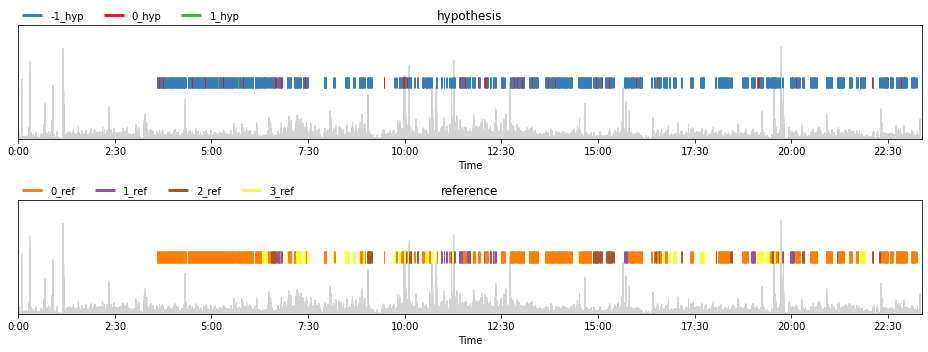

In [ ]:
import matplotlib
from matplotlib import style
import datetime
import librosa
import librosa.display

## Visualise Model Outputs as compared against the Ground Truth

def timeTicks(x, pos):
    d = datetime.timedelta(seconds=x)
    return str(d)[-5:] if x < 3600 else str(d)
formatter = matplotlib.ticker.FuncFormatter(timeTicks)

SR = 32000

def plot_der(FILEPATH,reference,hypothesis):
    fig = plt.figure(figsize=(13, 5))

    # plot hypothesis
    ax = plt.subplot(211)
    plt.title('hypothesis')
    ax.xaxis.set_major_formatter(formatter)
    wav, source_sr = librosa.load(FILEPATH, sr=SR)
    ticks_freq = ceil(len(wav) * .1 / source_sr)

    notebook.plot_annotation(hypothesis, legend=True, time=True)
    librosa.display.waveplot(wav, sr=source_sr, color='lightgray')

    # plot reference
    ax = plt.subplot(212)
    plt.title('reference')
    ax.xaxis.set_major_formatter(formatter)

    notebook.plot_annotation(reference, legend=True, time=True)
    librosa.display.waveplot(wav, sr=source_sr, color='lightgray')

    plt.margins(x=0.01)
    plt.tight_layout()
    plt.show()

%matplotlib inline

plot_der(os.path.join(os.path.join(AMI_AUDIO_FOLDER2,TRAIN_WORKING_RECORDING_IDS[20],'audio'),TRAIN_WORKING_RECORDING_IDS[20] +'.Mix-Headset.wav'),reference,hypothesis)

